# Lab 3 report 

Выполнили:
    
    Якимов M33011
    Подколзин M33071
    Юрченко M33031
    
Проверила:
    
    Гомозова В.Э.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import inf

In [ ]:
def check_stochastic(m):
    if not all(sum(row) == 1 for row in m):
        raise ValueError('Matrix is not stochastic')

In [ ]:
# Аналитически
def find_stationary_distribution(P):
	check_stochastic(P)

	PT = P.T
	PT -= np.identity(len(PT))
	PT = np.append(PT, [np.ones(len(PT))], axis=0)

	b = np.zeros((len(PT)))
	b[-1] = 1
    
	return np.linalg.lstsq(PT, b,rcond=None)[0]


In [ ]:
#Численно
def find_limiting_distribution(pi0, P, max_iter=100, epsilon=0.000000001):
	check_stochastic(P)
    
	pin_array = []
	norm_array = []
	cur_pi = pi0

	for _ in range(max_iter):
		pin_array.append(cur_pi.tolist()[0])
		prev_pi = cur_pi
		cur_pi = cur_pi@P
		norm_array.append(np.linalg.norm(prev_pi - cur_pi))
		if norm_array[-1] < epsilon:
			break

	make_plot(pin_array, norm_array)

	return cur_pi

In [ ]:
def make_plot(pin_array, norm_array):
	fig, (value_dist, mse) = plt.subplots(2, sharex=True)

	value_dist.set_title("Значения распределения вероятностей")
	value_dist.plot(range(0, len(pin_array)), pin_array)

	mse.set_title("Среднеквадратичное отклонения")
	mse.plot(norm_array)

	plt.show()

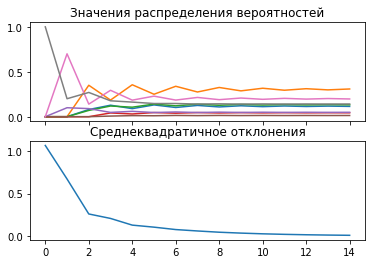

Result of find_stationary_distribution: [[0.11721754 0.30097071 0.13396972 0.04405149 0.04843917 0.01319499
  0.20110179 0.14105458]]


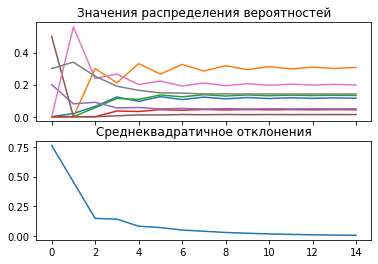

Result of find_stationary_distribution: [[0.11684041 0.30208077 0.13367453 0.04394478 0.04853351 0.01323353
  0.20056004 0.14113242]]
Limiting distribution: [0.11610013 0.3042631  0.13309627 0.04373594 0.04871826 0.01330963
 0.19949373 0.14128295]


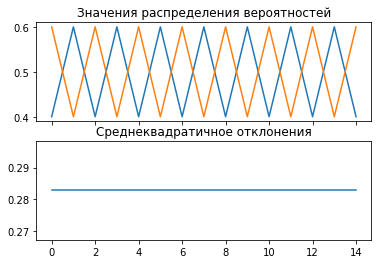

Result of find_stationary_distribution: [[0.6 0.4]]
Limiting distribution: [0.5 0.5]


In [ ]:
P = np.array([[0.1, 0.4, 0.5],
              [0.3, 0.5, 0.2],
              [0.1, 0.1, 0.8]])
P = np.array([[0,   1,   0,   0,   0,   0,   0,   0   ],
              [0.3, 0,   0.3, 0.1, 0,   0,   0.3, 0   ],
              [0,   0.5, 0,   0.1, 0.1, 0.1, 0,   0.2,],
              [0,   0.5, 0.5, 0,   0,   0,   0,   0   ],
              [0.1, 0,   0,   0,   0,   0,   0,   0.9 ],
              [0,   0,   0,   0,   0.1, 0,   0.7, 0.2 ],
              [0.1, 0.5, 0.1, 0,   0.1, 0,   0,   0.2 ],
              [0,   0,   0,   0,   0.1, 0,   0.7, 0.2 ]])
p0_1 = np.matrix([0, 0, 0, 0, 0, 0, 0, 1])
p0_2 = np.matrix([0, 0, 0, 0, 0.2, 0.5, 0, 0.3])

mi=15
eps=-inf

print(f'Result of find_stationary_distribution: {find_limiting_distribution(p0_1, P, max_iter=mi, epsilon=eps)}')
print(f'Result of find_stationary_distribution: {find_limiting_distribution(p0_2, P, max_iter=mi, epsilon=eps)}')

print(f'Limiting distribution: {find_stationary_distribution(P)}')



P = np.array([[0, 1],
              [1, 0]],dtype=np.float64)
p0_1 = np.matrix([0.4, 0.6])
print(f'Result of find_stationary_distribution: {find_limiting_distribution(p0_1, P, max_iter=mi, epsilon=eps)}')
print(f'Limiting distribution: {find_stationary_distribution(P)}')